# 6 Training an AI to create poetry

**Dataset**:  ".../My_Github_Repos/TensorFlow_Zero2Hero/TF_NLP_Zero2Hero/Datasets/Poetry.txt"

In [1]:
# to load the txt file

import os

txtfile = os.path.join(os.getcwd() + '\Datasets\Poetry.txt')
print(txtfile)

fileObject = open(txtfile, "r")
datastore = fileObject.read()
    
print(datastore)


C:\Users\xia12237.AVWORLD\My_Github_Repos\TensorFlow_Zero2Hero\TF_NLP_Zero2Hero\Datasets\Poetry.txt
In the town of Athy one Jeremy Lanigan
Battered away til he hadnt a pound.
His father died and made him a man again
Left him a farm and ten acres of ground.

He gave a grand party for friends and relations
Who didnt forget him when come to the wall,
And if youll but listen IIl make your eyes glisten
Of the rows and the ructions of Laniganâ€™s Ball.

Myself to be sure got free invitation,
For all the nice girls and boys | might ask,
And just in a minute both friends and relations
Were dancing round merry as bees round a cask.

Judy ODaly, that nice little milliner,
She tipped me a wink for to give her a call,
And | soon arrived with Peggy McGilligan
Just in time for Laniganâ€™s Ball.


In [2]:
#  Input data

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

# data = "In the town of Athy one Jeremy Lanigan \n Battered away ... ..."
corpus = datastore.lower().split("\n")
print(corpus)

tokenizer.fit_on_texts(corpus)       # corpus - 语料
total_words = len(tokenizer.word_index) + 1
print(total_words)

['in the town of athy one jeremy lanigan', 'battered away til he hadnt a pound.', 'his father died and made him a man again', 'left him a farm and ten acres of ground.', '', 'he gave a grand party for friends and relations', 'who didnt forget him when come to the wall,', 'and if youll but listen iil make your eyes glisten', 'of the rows and the ructions of laniganâ€™s ball.', '', 'myself to be sure got free invitation,', 'for all the nice girls and boys | might ask,', 'and just in a minute both friends and relations', 'were dancing round merry as bees round a cask.', '', 'judy odaly, that nice little milliner,', 'she tipped me a wink for to give her a call,', 'and | soon arrived with peggy mcgilligan', 'just in time for laniganâ€™s ball.']
95


In [29]:
# Text to sequence

input_sequences = []     # Input empty list of input sequence

for line in corpus:
    print(line)
    token_list = tokenizer.texts_to_sequences([line])[0]    # generate token for earch line in former corpus
    print(token_list)
    
    for i in range(1, len(token_list) ) :
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
    
    # print(input_sequences)
print('\n')
print(input_sequences)

in the town of athy one jeremy lanigan
[6, 3, 17, 4, 18, 19, 20, 21]
battered away til he hadnt a pound.
[22, 23, 24, 9, 25, 2, 26]
his father died and made him a man again
[27, 28, 29, 1, 30, 7, 2, 31, 32]
left him a farm and ten acres of ground.
[33, 7, 2, 34, 1, 35, 36, 4, 37]

[]
he gave a grand party for friends and relations
[9, 38, 2, 39, 40, 5, 10, 1, 11]
who didnt forget him when come to the wall,
[41, 42, 43, 7, 44, 45, 8, 3, 46]
and if youll but listen iil make your eyes glisten
[1, 47, 48, 49, 50, 51, 52, 53, 54, 55]
of the rows and the ructions of laniganâ€™s ball.
[4, 3, 56, 1, 3, 57, 4, 12, 13]

[]
myself to be sure got free invitation,
[58, 8, 59, 60, 61, 62, 63]
for all the nice girls and boys | might ask,
[5, 64, 3, 14, 65, 1, 66, 67, 68]
and just in a minute both friends and relations
[1, 15, 6, 2, 69, 70, 10, 1, 11]
were dancing round merry as bees round a cask.
[71, 72, 16, 73, 74, 75, 16, 2, 76]

[]
judy odaly, that nice little milliner,
[77, 78, 79, 14, 80, 81]
s

In [26]:
# Get the max len after spliting the list into multiple text
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)

11


In [30]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(
                            sequences=input_sequences,  # list
                            maxlen=max_sequence_len,    # integer
                            padding='pre'
                            )
print(padded_sequences)

input_sequences = np.array(padded_sequences)


[[ 0  0  0 ...  0  6  3]
 [ 0  0  0 ...  6  3 17]
 [ 0  0  0 ...  3 17  4]
 ...
 [ 0  0  0 ...  6 94  5]
 [ 0  0  0 ... 94  5 12]
 [ 0  0  0 ...  5 12 13]]


### Padded Input sequences to split to Input(X) and Label(Y)

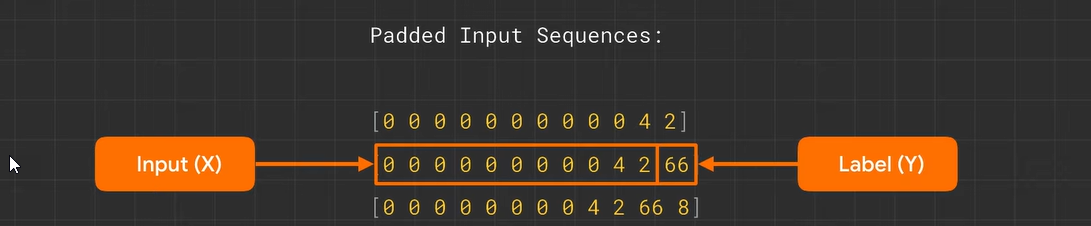

In [32]:
xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]

In [35]:
# categorical function
# Converts a class vector (integers) to binary class matrix.
# link: https://keras.io/api/utils/python_utils/#to_categorical-function

import tensorflow as tf

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

### Example:

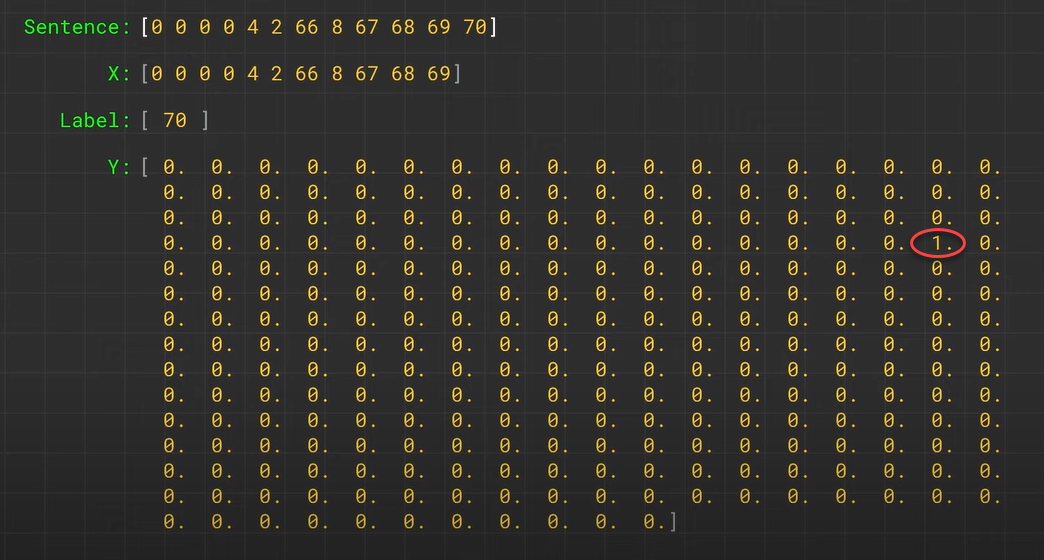

In [47]:
# Create model

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential() 

model.add(layers.Embedding(total_words, 240, input_length=max_sequence_len-1))   # Dimension=240, total words=num of unique words
model.add(layers.Bidirectional(layers.LSTM(150)))
model.add(layers.Dense(total_words, activation='softmax')) 

adam = keras.optimizers.Adam(lr=0.01)  
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(xs, ys, epochs=100, verbose=1)

C:\Users\xia12237.AVWORLD\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
4/4 [==============================] - 3s 10ms/step - loss: 4.6109 - accuracy: 0.0256
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 4.3739 - accuracy: 0.1026
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 3.8096 - accuracy: 0.1197
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 3.0734 - accuracy: 0.2137
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 2.3103 - accuracy: 0.3504
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 1.6255 - accuracy: 0.4786
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 1.2329 - accuracy: 0.6325
Epoch 8/100
4/4 [==============================] - 0s 52ms/step - loss: 0.8636 - accuracy: 0.7521
Epoch 9/100
4/4 [==============================] - 0s 71ms/step - loss: 0.7125 - accuracy: 0.7350
Epoch 10/100
4/4 [==============================] - 0s 65ms/step - loss: 0.3996 - accuracy: 0.8974
Epoch 11/100
4/4 [=

In [65]:
# Predict the word 

seed_text = "I made a poetry machine"
next_words = 20

for index in range(next_words) :
    
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    print(token_list)                         
                               
    # predicted = model.predict_classes(token_list, verbose=0)
    # the above line from the TensorFlow lesson does not work
    # the function in use is no longer supported in TensorFlow 2.6
    
    predicted = model.predict(token_list, verbose=0)
    classes_predict = np.argmax(predicted,axis=1)
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        # print(word,index)
        if index == classes_predict:
            output_word = word
            break

    seed_text += "   " + output_word

print(seed_text)


[[ 0  0  0  0  0  0  0  0 30  2]]
[[ 0  0  0  0  0  0  0 30  2 23]]
[[ 0  0  0  0  0  0 30  2 23 24]]
[[ 0  0  0  0  0 30  2 23 24  9]]
[[ 0  0  0  0 30  2 23 24  9 25]]
[[ 0  0  0 30  2 23 24  9 25  2]]
[[ 0  0 30  2 23 24  9 25  2 26]]
[[ 0 30  2 23 24  9 25  2 26 26]]
[[30  2 23 24  9 25  2 26 26 32]]
[[ 2 23 24  9 25  2 26 26 32 88]]
[[23 24  9 25  2 26 26 32 88 88]]
[[24  9 25  2 26 26 32 88 88 11]]
[[ 9 25  2 26 26 32 88 88 11 11]]
[[25  2 26 26 32 88 88 11 11 11]]
[[ 2 26 26 32 88 88 11 11 11 11]]
[[26 26 32 88 88 11 11 11 11 15]]
[[26 32 88 88 11 11 11 11 15  2]]
[[32 88 88 11 11 11 11 15  2 69]]
[[88 88 11 11 11 11 15  2 69 70]]
[[88 11 11 11 11 15  2 69 70 10]]
I made a poetry machine   away   til   he   hadnt   a   pound   pound   again   call   call   relations   relations   relations   relations   just   a   minute   both   friends   and
